# Toy NN
### A minimal python NN library for multilayer neural nets.
There's a lot of these out there doing this with numpy in 11 lines of code or so; but I wanted this to be:
- easily extendable, so had to be at least a little object oriented
- multilayer; most of the minimal example have one or two hardcoded layers
- have customizable loss and activation functions. 

In the end this has 43 lines of codes, so I would argue it's still pretty minimal :)


## Usage
We're going to try to learn the classic `XOR` function using a couple of layers. Very similar to the scikit-learn example seen [here](http://scikit-learn.org/stable/auto_examples/svm/plot_svm_nonlinear.html)


In [1]:
import matplotlib.pyplot as plt
import numpy as np
np.random.seed(1)
from toynn import NN, sigmoid, mse, train_test
%matplotlib inline

In [2]:
n_data = 500
xx, yy = np.meshgrid(np.linspace(-3, 3, 500),
                    np.linspace(-3, 3, 500))
X = np.random.randn(n_data, 2)

We drew `X` at random, now we label the points according to the `XOR` rule:

In [3]:
Y = np.logical_xor(X[:, 0] > np.random.randn(n_data)/3,
                   X[:, 1] > np.random.randn(n_data)/3)

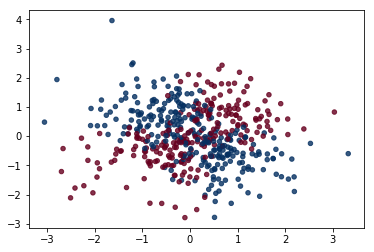

In [4]:
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='RdBu', s=20, alpha=.8);

Now we create our model and fit to data; we will use a three layer network with 20 hidden neurons for each. Note that the input dimension is two (a point in 2D space) and that the output dimension is one (true or false).

In [5]:
model = NN(layers=[(2, 20), (20, 20),  (20, 1)],
          activation=sigmoid,
          loss=mse)

In [6]:
model.train(X, Y, learning_rate = 1, n_train=5000, batch_size=32);

epoch 500 of 5000, loss: 0.26902
epoch 1000 of 5000, loss: 0.26700
epoch 1500 of 5000, loss: 0.26620
epoch 2000 of 5000, loss: 0.26610
epoch 2500 of 5000, loss: 0.27135
epoch 3000 of 5000, loss: 0.24247
epoch 3500 of 5000, loss: 0.13690
epoch 4000 of 5000, loss: 0.14364
epoch 4500 of 5000, loss: 0.14635
epoch 5000 of 5000, loss: 0.14418


Allright, pretty good training loss, let's vizualize the results:

In [7]:
yhat = model.predict(np.c_[xx.ravel(), yy.ravel()])
yhat = yhat.reshape(xx.shape)

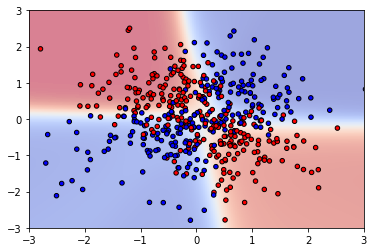

In [8]:
plt.imshow(yhat, interpolation='nearest',
           extent=(xx.min(), xx.max(), yy.min(), yy.max()), aspect='auto',
           origin='lower', cmap='coolwarm', alpha=0.5);

plt.scatter(X[:, 0], X[:, 1], c=Y,
            edgecolors='k', cmap='bwr',s=20);
plt.axis([-3,3,-3,3]);

The data is in the scatter plot, and our predictions for all plots in the grid are the background colors: we managed to learn the XOR rule!

In [13]:
model = NN(layers=[(2, 20), (20, 20),  (20, 1)],
          activation=sigmoid,
          loss=mse)

In [10]:
losses, test_losses = train_test(model, X, Y,
                                 train_pct=.5,
                                 epochs=20000, batch_size=32)

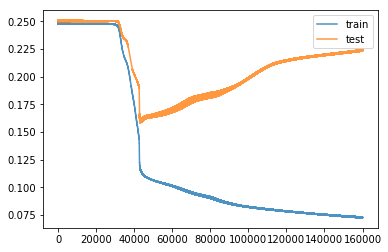

In [11]:
plt.plot(losses, label='train', alpha=.8)
plt.plot(test_losses, label='test', alpha=.8)
plt.legend()

In [14]:
yhat = model.predict(X)

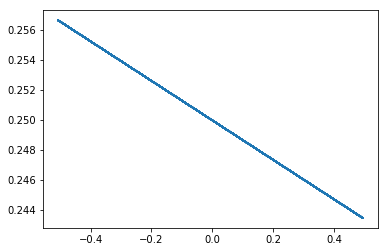

In [34]:
plt.plot((yhat - Y.reshape(-1, 1)).ravel(), ((yhat - Y.reshape(-1, 1)).ravel())**2)

(500,)